# Задание на оценку 4-5.
## 1. Прочитать файл данных.
## 2. Построить зависимости. (Настроить график: добавить название графика, подписи осей, сетку, легенду (подписи кривых), сделать график удобным для чтения (подобрать масштаб отображения данных))
## 3. Построить гистограммы.
## 4. Найти аппроксимирующий полином.
## 5. Определить точность аппроксимирующего полинома (значение СКО).

----
**НПМмд-01-19**

**Мухамаду Хади Диалло**
----

## 1. Прочитать файл данных.

In [219]:
# module 
import os 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# change work directory
# os.chdir("C: \\Users \\HP820 \\Desktop \\First Year RUDN \\MODULE 3 \\PYTHON \\exam_python")

# Importing data 
file_name="comparison-ww-monthly-201902-202002.csv"

#print(help(pd.read_csv))

with open(file_name, 'r') as f:
     data_compar=pd.read_csv(file_name)

print("*********comparison-ww-monthly-201902-202002********")
print("data shape :", np.shape(data_compar))
print(data_compar.iloc[:5,:5])

*********comparison-ww-monthly-201902-202002********
data shape : (13, 4)
      Date  Mobile  Desktop  Tablet
0  2019-02   47.96    48.21    3.83
1  2019-03   48.98    47.04    3.98
2  2019-04   48.32    47.79    3.90
3  2019-05   47.90    48.27    3.84
4  2019-06   50.71    45.53    3.76


In [288]:
# As panda
dataComp=pd.DataFrame(data_compar)
# add column
c=['feb19','mar19','apr19','may19','jun19','jul19','aug19','sep19','oct19','nov19','dec19','jan20','feb20']
dataComp['Month']=c
del dataComp['Date']
for i in c:
    dataComp.index = c
dataComp

,Mobile,Desktop,Tablet,Month
feb19,47.96,48.21,3.83,feb19
mar19,48.98,47.04,3.98,mar19
apr19,48.32,47.79,3.90,apr19
may19,47.90,48.27,3.84,may19
jun19,50.71,45.53,3.76,jun19
jul19,51.11,45.18,3.71,jul19
aug19,51.65,44.60,3.75,aug19
sep19,51.78,44.57,3.65,sep19
oct19,52.48,44.59,2.93,oct19
nov19,52.03,45.17,2.80,nov19


In [47]:
# Descripition
df1=pd.DataFrame(dataComp['Mobile'].describe())
df2=pd.DataFrame(dataComp['Desktop'].describe())
df3=pd.DataFrame(dataComp['Tablet'].describe())
print(df1.T)
print(df2.T)
print(df3.T)

        count       mean       std   min    25%    50%    75%    max
Mobile   13.0  50.763077  1.837654  47.9  48.98  51.65  52.02  53.29
         count       mean      std    min   25%    50%    75%    max
Desktop   13.0  45.837692  1.47804  43.99  44.6  45.29  47.04  48.27
        count      mean       std   min  25%   50%   75%   max
Tablet   13.0  3.401538  0.537848  2.65  2.8  3.71  3.83  3.98


## 2. Построить зависимости. (Настроить график: добавить название графика, подписи осей, сетку, легенду (подписи кривых), сделать график удобным для чтения (подобрать масштаб отображения данных))

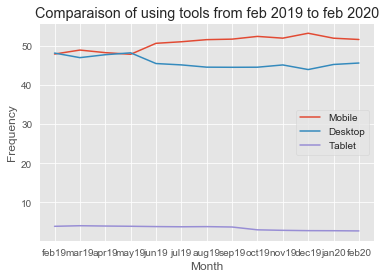

In [289]:
fig, ax = plt.subplots()
ax.plot(dataComp['Month'],dataComp['Mobile'], label='Mobile')
ax.plot(dataComp['Month'],dataComp['Desktop'], label='Desktop')
ax.plot(dataComp['Month'],dataComp['Tablet'], label='Tablet')
ax.set_xlabel("Month")
ax.set_ylabel("Frequency")
ax.set_title("Comparaison of using tools from feb 2019 to feb 2020")
ax.legend()
def comp_graph(a) :
    fig, ax = plt.subplots()
    ax.plot(dataComp['Month'],dataComp[a], 'b', label=a)
    ax.set_xlabel("Month")
    ax.set_ylabel("Frequency")
    ax.set_title("Using "+a+" from feb 2019 to feb 2020")
    ax.legend()

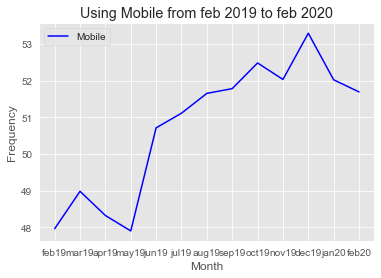

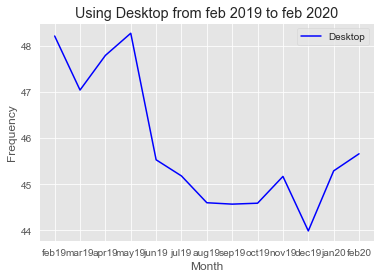

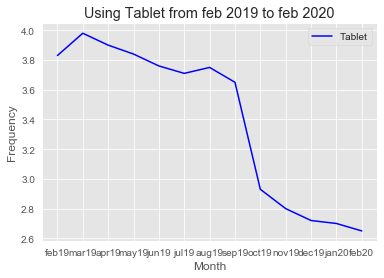

In [290]:
comp_graph('Mobile')
comp_graph('Desktop')
comp_graph('Tablet')

## 3. Построить гистограммы.

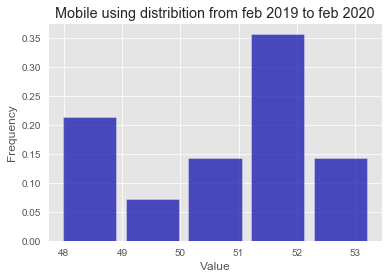

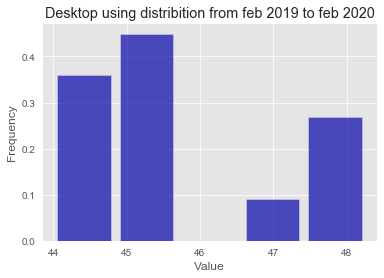

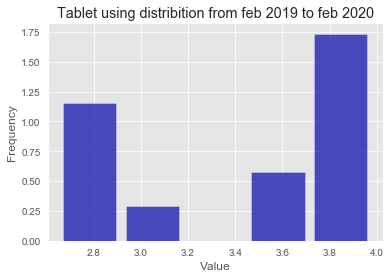

In [291]:
def histogramm(a) :
    plt.style.use('ggplot')
    plt.hist(dataComp[a], bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85, density=True)
    plt.grid(axis='y', alpha=0.95)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(a+ ' using distribition from feb 2019 to feb 2020')
    plt.show()
histogramm('Mobile')
histogramm('Desktop')
histogramm('Tablet')

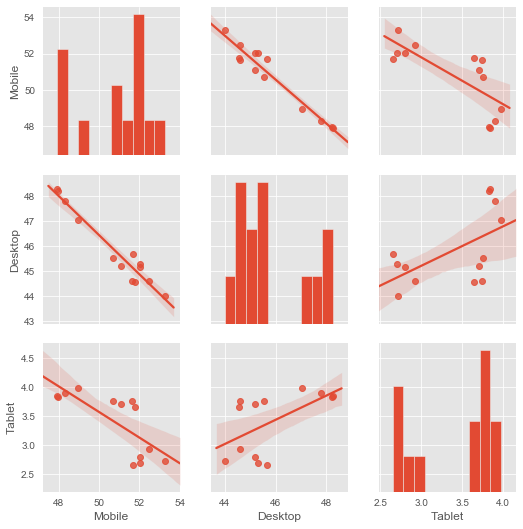

In [292]:
import seaborn
seaborn.pairplot(dataComp, vars=['Mobile', 'Desktop', 'Tablet'],
                 kind='reg') # ,hue='Month'

In [287]:
#bar_plot('Mobile')
#bar_plot('Desktop')
#bar_plot('Tablet')

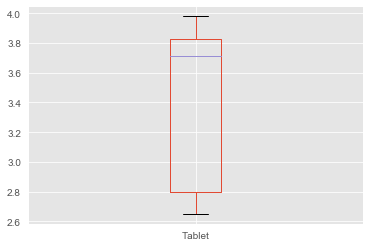

In [293]:
# Another the way to describe
#dataComp.boxplot(column=['Mobile'])
#dataComp.boxplot(column=['Desktop'])
dataComp.boxplot(column=['Tablet'])

## 4. Найти аппроксимирующий полином.

### Мы будем использовать полиномиальное приближение Лагранжа. 


In [269]:
# Lagrange Polynomials 
def lagrange_P(points,x):
    total = 0
    n = len(points)
    for i in range(n):
        xi, yi = points[i]
        def g(i, n):
            tot_mul = 1
            for j in range(n):
                if i == j:
                    continue
                xj, yj = points[j]
                tot_mul *= (x - xj) / float(xi - xj)
            return tot_mul 
        total += yi * g(i, n)
    return total

def interpolation (a,b) :
    x_dot=np.arange(13)
    x_dot=pd.DataFrame(x_dot)
    x_dot.columns=['x_dot']
    x_dot=x_dot['x_dot'].to_list()
    y_dot=dataComp[a].to_list()

    dataPoints=[]
    for i in range(len(x_dot)) :
        dataPoints.append((x_dot[i],y_dot[i]))
    
    global mydata
    mydata=np.array(dataPoints)
    mydata
    
    global data
    data=[]

    xplot = np.linspace ( b, 12 , 13 )

    for i in range(len(x_dot)) :
        data.append([i,lagrange_P(mydata,xplot[i])])
    data=np.array(data)

    fig, ax = plt.subplots()
    ax.plot(mydata[:,0],mydata[:,1],'b', label=a)
    ax.plot(data[:,0],data[:,1],'--r', label='Approx_'+a)
    ax.set_xlabel("month")
    ax.set_ylabel("Polynomes")
    ax.set_title("Lagrange Polynomials >>>"+a)
    ax.legend()

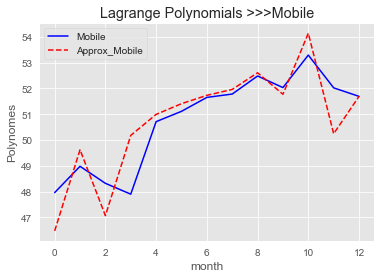

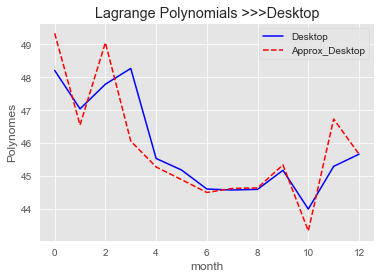

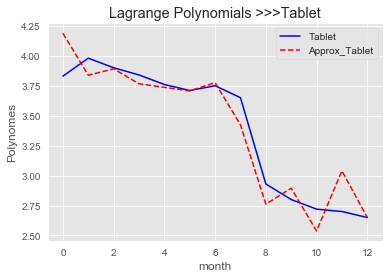

In [273]:
interpolation('Mobile',0.9)
interpolation('Desktop',0.9)
interpolation('Tablet',0.9)
error_term1=data[:,1]-mydata[:,1]

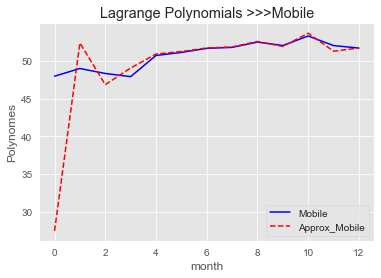

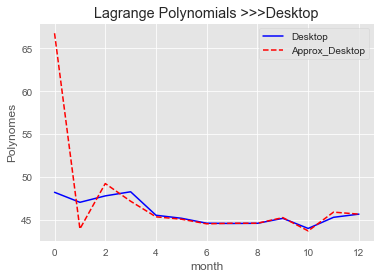

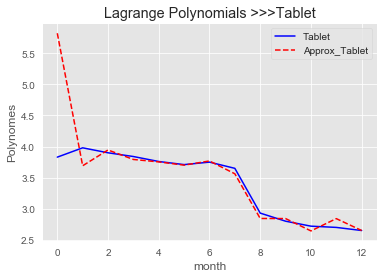

In [285]:
interpolation('Mobile',0.4)
interpolation('Desktop',0.4)
interpolation('Tablet',0.4)
error_term2=data[:,1]-mydata[:,1]

## 5. Определить точность аппроксимирующего полинома (значение СКО).

### Мы видели, что ошибка уменьшается, принимая больше очков и будет тем более меньше, 
### чем x близок к точке интерполяции f не меняется слишком резко

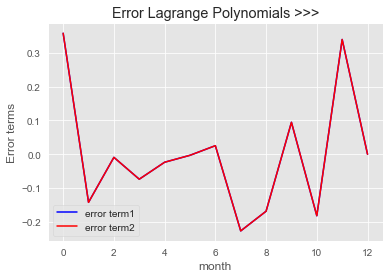

In [282]:
fig, ax = plt.subplots()
ax.plot(mydata[:,0],error_term1,'-b', label='error term1')
ax.plot(mydata[:,0],error_term1,'-r', label='error term2')
ax.set_xlabel("month")
ax.set_ylabel("Error terms")
ax.set_title("Error Lagrange Polynomials >>>")
ax.legend()